# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  10.0M      0  0:00:08  0:00:08 --:--:-- 10.8M
total 88
-rw-r--r-- 1 anovikov anovikov 20937 Jun 30 09:01 image_denoising.ipynb
drwx------ 2 anovikov anovikov 57344 Jun  9 15:06 paintings
-rw-r--r-- 1 anovikov anovikov     0 Jun 29 09:19 README.md
drwxr-xr-x 2 anovikov anovikov  4096 Jun 29 09:19 tests


In [45]:
import glob
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Kazimir_Malevich_13.jpg',
 './paintings/Jan_van_Eyck_15.jpg',
 './paintings/Albrecht_Duâ\x95\xa0Ãªrer_34.jpg',
 './paintings/Edgar_Degas_271.jpg',
 './paintings/Titian_45.jpg',
 './paintings/Paul_Gauguin_65.jpg',
 './paintings/Andy_Warhol_89.jpg',
 './paintings/Pierre-Auguste_Renoir_151.jpg',
 './paintings/Pablo_Picasso_120.jpg',
 './paintings/Vincent_van_Gogh_305.jpg',
 './paintings/Pablo_Picasso_186.jpg',
 './paintings/Pablo_Picasso_63.jpg',
 './paintings/Albrecht_DuÌ\x88rer_244.jpg',
 './paintings/Frida_Kahlo_87.jpg',
 './paintings/Vincent_van_Gogh_558.jpg',
 './paintings/Pablo_Picasso_14.jpg',
 './paintings/Rene_Magritte_94.jpg',
 './paintings/El_Greco_63.jpg',
 './paintings/Gustav_Klimt_104.jpg',
 './paintings/Paul_Gauguin_12.jpg',
 './paintings/Vasiliy_Kandinskiy_57.jpg',
 './paintings/Edgar_Degas_228.jpg',
 './paintings/Marc_Chagall_101.jpg',
 './paintings/Pierre-Auguste_Renoir_57.jpg',
 './paintings/Leonardo_da_Vinci_50.jpg',
 './paintings/Rene_Magritte_50.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

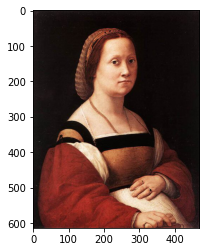

In [92]:
# YOUR CODE HERE
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open(dataset_paths[53])
plt.imshow(im)

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [93]:
# YOUR CODE HERE
import cv2

pic = cv2.imread(dataset_paths[53])
pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)

img_shape = pic.shape
print(img_shape)
img_dim = pic.ndim
print(img_dim)

(614, 469, 3)
3


❓ **What was in the image above?**

In [94]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
# is_portrait = False

is_colored_image = True
#is_colored_image = False

In [95]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [97]:
# YOUR CODE HERE
dataset_images = []
for img in dataset_paths:
    pic = cv2.imread(img)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
    dataset_images.append(pic)
    
dataset_images

[array([[[154, 156, 132],
         [159, 161, 137],
         [183, 187, 162],
         ...,
         [ 86, 102, 118],
         [ 51,  67,  83],
         [ 84, 101, 121]],
 
        [[150, 152, 130],
         [157, 161, 136],
         [187, 191, 168],
         ...,
         [ 67,  80,  97],
         [ 80,  96, 112],
         [ 61,  76,  95]],
 
        [[150, 153, 132],
         [118, 123, 100],
         [109, 114,  92],
         ...,
         [ 74,  87, 103],
         [ 91, 104, 121],
         [ 52,  65,  82]],
 
        ...,
 
        [[211, 190, 163],
         [249, 230, 200],
         [181, 164, 134],
         ...,
         [155, 139, 126],
         [150, 133, 126],
         [164, 146, 146]],
 
        [[198, 176, 152],
         [201, 181, 154],
         [195, 178, 150],
         ...,
         [166, 150, 137],
         [157, 140, 133],
         [166, 148, 148]],
 
        [[221, 199, 175],
         [226, 206, 181],
         [240, 223, 195],
         ...,
         [183, 167, 154],
  

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [98]:
# YOUR CODE HERE
dims = set()
for img in dataset_images:
    dims.add(img.ndim)
print('Observed number of dimensions:', dims)

"I have no idea how to explain that all pictures have 3 color channels"

Observed number of dimensions: {3}


'I have no idea how to explain that all the pictures have 3 color channels'

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [99]:
from tqdm import tqdm
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 27840.91it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [100]:
# YOUR CODE HERE
import numpy as np
import tensorflow as tf

dataset_resized = np.empty((len(dataset_images), 120, 100, 3))

for i, img in enumerate(dataset_images):
    dataset_resized[i] = tf.image.resize(img, [120, 100])
    
dataset_resized.shape

(1085, 120, 100, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [101]:
# YOUR CODE HERE
dataset_scaled = dataset_resized / 255
dataset_scaled[0]

array([[[0.61335294, 0.62837255, 0.53133335],
        [0.67198038, 0.69158822, 0.60139214],
        [0.4004902 , 0.43245099, 0.36411764],
        ...,
        [0.30529402, 0.3546078 , 0.39490177],
        [0.25221594, 0.30611788, 0.36009833],
        [0.30739279, 0.36980459, 0.43354959]],

       [[0.50990194, 0.5445294 , 0.47035295],
        [0.4339804 , 0.47811764, 0.40845098],
        [0.31656862, 0.36980393, 0.30764705],
        ...,
        [0.26617671, 0.31941205, 0.35470617],
        [0.24698032, 0.286196  , 0.32741173],
        [0.25756836, 0.29678405, 0.34384287]],

       [[0.41576472, 0.4775098 , 0.43862744],
        [0.29266669, 0.35541178, 0.3161961 ],
        [0.25078433, 0.3242157 , 0.29058826],
        ...,
        [0.22725615, 0.28049149, 0.31578561],
        [0.33488291, 0.37017703, 0.40347111],
        [0.48119698, 0.50764806, 0.53935391]],

       ...,

       [[0.96421569, 0.88903922, 0.76029412],
        [0.86866665, 0.83037253, 0.66474508],
        [0.92774509, 0

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [102]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

Text(0.5, 1.0, 'Original image')

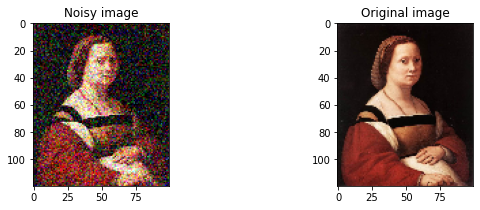

In [103]:
# YOUR CODE HERE
fig, axs = plt.subplots(1, 2, figsize=(10,3))

axs[0].imshow(dataset_noisy[53])
axs[0].set_title('Noisy image')

axs[1].imshow(dataset_scaled[53])
axs[1].set_title('Original image')

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset_noisy, dataset_scaled, test_size=0.2)

In [112]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [575]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [576]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [577]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY

encoder = None

👉 **Test your encoder below**

In [579]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [580]:
# YOUR CODE HERE

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [581]:
# YOUR CODE HERE

❓ **Plot your training and validation loss at each epoch using the cell below**

In [583]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [585]:
# YOUR CODE HERE

In [591]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [588]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()